In [29]:
#import pandas 
import pandas as pd
import numpy as np


In [16]:
!pip install mysql-connector-python


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
#Read and view data into pandas dataframe
data = pd.read_csv("D:\DS_ML\Customer_Behavior_Analysis\customers.csv")
data.head()



<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Mukesh\AppData\Local\Temp\ipykernel_5756\551993038.py:2: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("D:\DS_ML\Customer_Behavior_Analysis\customers.csv")


,CustomerID,CustomerName,Email,Gender,Age,GeographyID
0,1,Emma Anderson,emma.anderson@example.com,Male,50,2
1,2,Sarah Brown,sarah.brown@example.com,Female,37,4
2,3,Robert Hernandez,robert.hernandez@example.com,Female,26,6
3,4,David Garcia,david.garcia@example.com,Male,25,8
4,5,Emma Miller,emma.miller@example.com,Female,41,4


In [18]:
#missing value
data.isnull().sum()

CustomerID      0
CustomerName    0
Email           0
Gender          0
Age             0
GeographyID     0
dtype: int64

In [19]:
#drop the missing value
df = data.dropna().copy()


In [20]:
#check for dulpicdate
df.duplicated().sum()

np.int64(0)

In [21]:
#type cast
df.dtypes

CustomerID       int64
CustomerName    object
Email           object
Gender          object
Age              int64
GeographyID      int64
dtype: object

In [22]:
# Database set

from mysql.connector import connect as ct # type: ignore

# Create connection
connection = ct(
    host='localhost',
    port='3306',# Port should be an integer, not a string
    user='root',
    password='Shamsingh@1234',
    database='customer_analytics'  # Use 'database' instead of 'db'
)

print(connection.is_connected())  # Corrected method name

# Close the connection when you're done
connection.close()


True


In [23]:
import pandas as pd

# Load datasets into DataFrames
try:
    customers = pd.read_csv('Customers.csv')
    journey = pd.read_csv('Customer_journey.csv')
    engagement = pd.read_csv('engagement_data.csv')
    reviews = pd.read_csv('Customer_reviews.csv')
    

    # Preview data structure
    print("Customers DataFrame:")
    print(customers.head())
    
    print("\nCustomer Journey DataFrame:")
    print(journey.head())

    print("\nCustomer engagement DataFrame:")
    print(engagement.head())
    
    print("\nCustomer Reviews DataFrame:")
    print(reviews.head())

except FileNotFoundError as e:
    print(f"Error: {e}. Please check if the file exists in the specified path.")
except pd.errors.EmptyDataError:
    print("Error: One of the files is empty.")
except pd.errors.ParserError:
    print("Error: There was a problem parsing one of the files.")


Customers DataFrame:
   CustomerID      CustomerName                         Email  Gender  Age  \
0           1     Emma Anderson     emma.anderson@example.com    Male   50   
1           2       Sarah Brown       sarah.brown@example.com  Female   37   
2           3  Robert Hernandez  robert.hernandez@example.com  Female   26   
3           4      David Garcia      david.garcia@example.com    Male   25   
4           5       Emma Miller       emma.miller@example.com  Female   41   

   GeographyID  
0            2  
1            4  
2            6  
3            8  
4            4  

Customer Journey DataFrame:
   JourneyID  CustomerID  ProductID   VisitDate        Stage    Action  \
0          1          64         18  2024-06-10     Checkout  Drop-off   
1          2          94         11  2025-07-09     Checkout  Drop-off   
2          3          34          8  2024-06-14  ProductPage      View   
3          4          33         18  2025-05-28     Checkout  Drop-off   
4        

In [24]:
from textblob import TextBlob

# Analyze sentiment of review text
reviews['Sentiment'] = reviews['ReviewText'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Find negative reviews (sentiment < 0)
negative_reviews = reviews[reviews['Sentiment'] < 0]
print(negative_reviews[['ProductID', 'ReviewText']].head())


    ProductID                                        ReviewText
16          4                           Not  worth  the  money.
19          6  I  had  a  bad  experience  with  this  product.
44         16                           Not  worth  the  money.
56         10             Disappointed  with  the  performance.
64          3                           Not  worth  the  money.


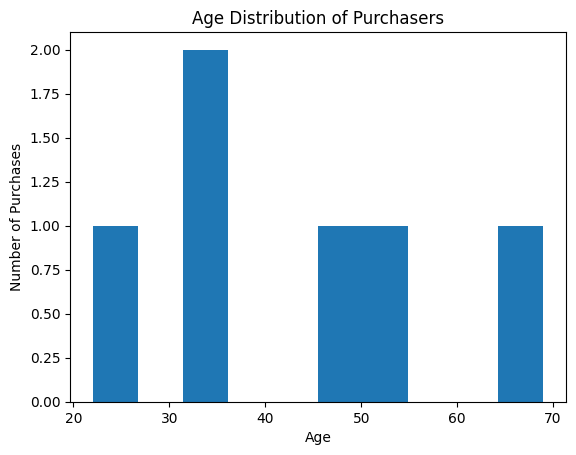

In [25]:
import matplotlib.pyplot as plt

# Plot age distribution of customers who made purchases
purchases = journey[journey['Action'] == 'Purchase']
merged_data = pd.merge(purchases, customers, on='CustomerID')

plt.hist(merged_data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.title('Age Distribution of Purchasers')
plt.show()


In [26]:
#Where are customers leaving?

#Check where customers drop off
import pandas as pd

# Load the CustomerJourney data from a CSV file
# Replace 'CustomerJourney.csv' with your actual file path
customer_journey = pd.read_csv('Customer_journey.csv')
# Calculate the number of visitors and purchases by stage
drop_off_analysis = customer_journey.groupby('Stage').agg(
    Visitors=('CustomerID', 'count'),  # Count of visitors (CustomerID)
    Purchases=('Action', lambda x: (x == 'Purchase').sum())  # Count purchases
).reset_index()

# Display the results
print(drop_off_analysis)


         Stage  Visitors  Purchases
0     Checkout        18          6
1     Homepage        50          0
2  ProductPage        24          0
3     checkout         2          0
4     homepage         4          0
5  productpage         2          0


In [27]:
#What products do people hate?

#Check product ratings
import pandas as pd

# Load the SportsProducts and ReviewData from CSV files
sports_products = pd.read_csv('Products.csv')  # Replace with your actual file path
review_data = pd.read_csv('customer_reviews.csv')          # Replace with your actual file path
# Merge the two DataFrames on ProductID
merged_data = pd.merge(sports_products, review_data, on='ProductID', how='inner')
# Calculate average rating and review count by product
product_ratings = merged_data.groupby(['ProductID', 'ProductName']).agg(
    AvgRating=('Rating', 'mean'),        # Calculate average rating
    ReviewCount=('ReviewID', 'count')    # Count number of reviews
).reset_index()

# Filter for products with an average rating less than 3.5
bad_rated_products = product_ratings[product_ratings['AvgRating'] < 3.5]

# Display the results
print(bad_rated_products)



    ProductID     ProductName  AvgRating  ReviewCount
3           4       Dumbbells   3.000000            5
6           7      Basketball   2.666667            3
8           9  Baseball Glove   3.400000            5
11         12      Ice Skates   3.000000            2
14         16           Kayak   3.400000           10


In [28]:
#Find customers with the most purchases

import pandas as pd

# Load the CustomerJourney data from a CSV file
# Replace 'CustomerJourney.csv' with your actual file path
customer_journey = pd.read_csv('Customer_journey.csv')
# Count total purchases for each customer
customer_purchases = customer_journey[customer_journey['Action'] == 'Purchase'].groupby('CustomerID').size().reset_index(name='TotalPurchases')

# Sort by TotalPurchases in descending order and get the top 10 customers
top_customers = customer_purchases.sort_values(by='TotalPurchases', ascending=False).head(10)

# Display the results
print(top_customers)



   CustomerID  TotalPurchases
0          17               1
1          42               1
2          46               1
3          58               1
4          79               1
5          89               1


In [2]:
import pandas as pd
from mysql.connector import connect

connection=connect(
    host='localhost',
    port='3306',# Port should be an integer, not a string
    user='root',
    password='Shamsingh@1234',
    database='customer_analytics'  # Use 'database' instead of 'db'
)
if connection.is_connected():
    print("True")
else:
    print("False") 

cursor=connection.cursor()  
cursor.execute("SHow Tables") 
tables=cursor.fetchall() 
print(tables)
tables_df=pd.DataFrame(tables,list(range(1,7)),columns=["Table_name"])
tables_df
       
   

True
[('customerdata',), ('customerjourney',), ('engagementdata',), ('geographydata',), ('reviewdata',), ('sportsproducts',)]


,Table_name
1,customerdata
2,customerjourney
3,engagementdata
4,geographydata
5,reviewdata
6,sportsproducts


In [4]:
import pandas as pd
cursor.execute("select * from sportsproducts")
sportsproducts=cursor.fetchall()
print(sportsproducts)
sportsproducts_df=pd.DataFrame(sportsproducts,list(range(1,21)),columns=["ProductID","ProductName","Category",'Price'])
sportsproducts_df

[(1, 'Running Shoes', 'Sports', Decimal('223.75')), (2, 'Fitness Tracker', 'Sports', Decimal('196.68')), (3, 'Yoga Mat', 'Sports', Decimal('485.32')), (4, 'Dumbbells', 'Sports', Decimal('26.21')), (5, 'Soccer Ball', 'Sports', Decimal('41.26')), (6, 'Tennis Racket', 'Sports', Decimal('36.07')), (7, 'Basketball', 'Sports', Decimal('225.12')), (8, 'Football Helmet', 'Sports', Decimal('44.75')), (9, 'Baseball Glove', 'Sports', Decimal('327.36')), (10, 'Golf Clubs', 'Sports', Decimal('81.59')), (11, 'Ski Boots', 'Sports', Decimal('340.20')), (12, 'Ice Skates', 'Sports', Decimal('37.56')), (13, 'Swim Goggles', 'Sports', Decimal('145.97')), (14, 'Cycling Helmet', 'Sports', Decimal('472.32')), (15, 'Climbing Rope', 'Sports', Decimal('410.17')), (16, 'Kayak', 'Sports', Decimal('259.40')), (17, 'Surfboard', 'Sports', Decimal('275.43')), (18, 'Volleyball', 'Sports', Decimal('42.80')), (19, 'Hockey Stick', 'Sports', Decimal('173.83')), (20, 'Boxing Gloves', 'Sports', Decimal('262.32'))]


,ProductID,ProductName,Category,Price
1,1,Running Shoes,Sports,223.75
2,2,Fitness Tracker,Sports,196.68
3,3,Yoga Mat,Sports,485.32
4,4,Dumbbells,Sports,26.21
5,5,Soccer Ball,Sports,41.26
6,6,Tennis Racket,Sports,36.07
7,7,Basketball,Sports,225.12
8,8,Football Helmet,Sports,44.75
9,9,Baseball Glove,Sports,327.36
10,10,Golf Clubs,Sports,81.59


In [5]:
cursor.execute("select * from geographydata")
geographydata=cursor.fetchall()
print(geographydata)
geographydata_df=pd.DataFrame(geographydata,list(range(1,11)),columns=["GeographyID","Country","City"])
geographydata_df

[(1, 'UK', 'London'), (2, 'Germany', 'Berlin'), (3, 'France', 'Paris'), (4, 'Spain', 'Madrid'), (5, 'Italy', 'Rome'), (6, 'Netherlands', 'Amsterdam'), (7, 'Belgium', 'Brussels'), (8, 'Sweden', 'Stockholm'), (9, 'Switzerland', 'Zurich'), (10, 'Austria', 'Vienna')]


,GeographyID,Country,City
1,1,UK,London
2,2,Germany,Berlin
3,3,France,Paris
4,4,Spain,Madrid
5,5,Italy,Rome
6,6,Netherlands,Amsterdam
7,7,Belgium,Brussels
8,8,Sweden,Stockholm
9,9,Switzerland,Zurich
10,10,Austria,Vienna


In [6]:
cursor.execute("select * from engagementdata")
engagementdata=cursor.fetchall()
print(engagementdata)
engagementdata_df=pd.DataFrame(engagementdata,list(range(1,101)),columns=["EngagementID","ContentID","ContentType","Likes","EngagementDate","CampaignDate","ProductID","ViewsClicksCombined"])
engagementdata_df.head(10)

[(1, 39, 'Blog', 190, datetime.date(2023, 8, 30), 1, 9, '1883-671'), (2, 48, 'Blog', 114, datetime.date(2023, 3, 28), 18, 20, '5280-532'), (3, 16, 'video', 32, datetime.date(2023, 12, 8), 7, 14, '1905-204'), (4, 43, 'Video', 17, datetime.date(2025, 1, 21), 19, 20, '2766-257'), (5, 16, 'newsletter', 306, datetime.date(2024, 2, 21), 6, 15, '5116-1524'), (6, 32, 'Socialmedia', 648, datetime.date(2023, 6, 18), 18, 19, '8237-1641'), (7, 33, 'SOCIALMEDIA', 1, datetime.date(2025, 10, 1), 12, 2, '750-34'), (8, 47, 'Blog', 1, datetime.date(2025, 3, 31), 17, 6, '891-35'), (9, 48, 'blog', 123, datetime.date(2024, 3, 19), 13, 16, '5571-1527'), (10, 4, 'Blog', 25, datetime.date(2023, 12, 3), 15, 15, '4279-297'), (11, 38, 'Socialmedia', 29, datetime.date(2024, 5, 26), 19, 6, '4297-234'), (12, 29, 'socialmedia', 396, datetime.date(2023, 6, 15), 3, 10, '7877-2037'), (13, 14, 'video', 12, datetime.date(2025, 2, 4), 12, 18, '1796-136'), (14, 2, 'Socialmedia', 317, datetime.date(2023, 8, 26), 16, 2, '683

,EngagementID,ContentID,ContentType,Likes,EngagementDate,CampaignDate,ProductID,ViewsClicksCombined
1,1,39,Blog,190,2023-08-30,1,9,1883-671
2,2,48,Blog,114,2023-03-28,18,20,5280-532
3,3,16,video,32,2023-12-08,7,14,1905-204
4,4,43,Video,17,2025-01-21,19,20,2766-257
5,5,16,newsletter,306,2024-02-21,6,15,5116-1524
6,6,32,Socialmedia,648,2023-06-18,18,19,8237-1641
7,7,33,SOCIALMEDIA,1,2025-10-01,12,2,750-34
8,8,47,Blog,1,2025-03-31,17,6,891-35
9,9,48,blog,123,2024-03-19,13,16,5571-1527
10,10,4,Blog,25,2023-12-03,15,15,4279-297


In [8]:
cursor.execute("select * from customerdata")
customerdata=cursor.fetchall()
print(customerdata)
customerdata_df=pd.DataFrame(customerdata,list(range(1,101)),columns=["CustomerID","CustomerName","Email","Gender","Age","GeographyID"])
customerdata_df.head(10)

[(1, 'Emma Anderson', 'emma.anderson@example.com', 'Male', 50, 2), (2, 'Sarah Brown', 'sarah.brown@example.com', 'Female', 37, 4), (3, 'Robert Hernandez', 'robert.hernandez@example.com', 'Female', 26, 6), (4, 'David Garcia', 'david.garcia@example.com', 'Male', 25, 8), (5, 'Emma Miller', 'emma.miller@example.com', 'Female', 41, 4), (6, 'Daniel Rodriguez', 'daniel.rodriguez@example.com', 'Male', 31, 7), (7, 'Laura Miller', 'laura.miller@example.com', 'Male', 35, 7), (8, 'James Gonzalez', 'james.gonzalez@example.com', 'Female', 18, 8), (9, 'Emily Thomas', 'emily.thomas@example.com', 'Male', 29, 10), (10, 'Chris Davis', 'chris.davis@example.com', 'Female', 46, 2), (11, 'Emma Garcia', 'emma.garcia@example.com', 'Male', 54, 10), (12, 'James Lopez', 'james.lopez@example.com', 'Female', 43, 7), (13, 'David Wilson', 'david.wilson@example.com', 'Male', 50, 1), (14, 'Olivia Wilson', 'olivia.wilson@example.com', 'Male', 60, 4), (15, 'Emma Martinez', 'emma.martinez@example.com', 'Male', 32, 9), (16

,CustomerID,CustomerName,Email,Gender,Age,GeographyID
1,1,Emma Anderson,emma.anderson@example.com,Male,50,2
2,2,Sarah Brown,sarah.brown@example.com,Female,37,4
3,3,Robert Hernandez,robert.hernandez@example.com,Female,26,6
4,4,David Garcia,david.garcia@example.com,Male,25,8
5,5,Emma Miller,emma.miller@example.com,Female,41,4
6,6,Daniel Rodriguez,daniel.rodriguez@example.com,Male,31,7
7,7,Laura Miller,laura.miller@example.com,Male,35,7
8,8,James Gonzalez,james.gonzalez@example.com,Female,18,8
9,9,Emily Thomas,emily.thomas@example.com,Male,29,10
10,10,Chris Davis,chris.davis@example.com,Female,46,2


In [9]:
cursor.execute("select * from reviewdata")
reviewdata=cursor.fetchall()
print(reviewdata)
reviewdata_df=pd.DataFrame(reviewdata,list(range(1,101)),columns=["ReviewID","CustomerID","ProductID","ReviewDate","Rating","ReviewText"])
reviewdata_df.head(10)

[(1, 77, 18, datetime.date(2023, 12, 23), 3, 'Average experience, nothing special.'), (2, 80, 19, datetime.date(2024, 12, 25), 5, 'The quality is top-notch.'), (3, 50, 13, datetime.date(2025, 1, 26), 4, 'Five stars for the quick delivery.'), (4, 78, 15, datetime.date(2025, 4, 21), 3, 'Good quality, but could be cheaper.'), (5, 64, 2, datetime.date(2023, 7, 16), 3, 'Average experience, nothing special.'), (6, 81, 1, datetime.date(2025, 12, 21), 4, 'Customer support was very helpful.'), (7, 16, 1, datetime.date(2024, 1, 29), 3, 'Average experience, nothing special.'), (8, 55, 8, datetime.date(2024, 8, 15), 5, 'The quality is top-notch.'), (9, 3, 13, datetime.date(2023, 9, 1), 4, 'I love this product, will buy again!'), (10, 78, 6, datetime.date(2024, 6, 17), 5, 'Excellent product, highly recommend!'), (11, 54, 9, datetime.date(2023, 7, 17), 4, 'Great purchase, very satisfied.'), (12, 77, 2, datetime.date(2025, 1, 13), 2, 'Product did not meet my expectations.'), (13, 93, 6, datetime.date

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText
1,1,77,18,2023-12-23,3,"Average experience, nothing special."
2,2,80,19,2024-12-25,5,The quality is top-notch.
3,3,50,13,2025-01-26,4,Five stars for the quick delivery.
4,4,78,15,2025-04-21,3,"Good quality, but could be cheaper."
5,5,64,2,2023-07-16,3,"Average experience, nothing special."
6,6,81,1,2025-12-21,4,Customer support was very helpful.
7,7,16,1,2024-01-29,3,"Average experience, nothing special."
8,8,55,8,2024-08-15,5,The quality is top-notch.
9,9,3,13,2023-09-01,4,"I love this product, will buy again!"
10,10,78,6,2024-06-17,5,"Excellent product, highly recommend!"


In [10]:
cursor.execute("select * from customerjourney")
customerjourney=cursor.fetchall()
print(customerjourney)
customerjourney_df=pd.DataFrame(customerjourney,list(range(1,101)),columns=["JourneyID","CustomerID","ProductID","VisitDate","Stage","Action","Duration"])
customerjourney_df.head(10)

[(1, 64, 18, datetime.date(2024, 6, 10), 'Checkout', 'Drop-off', None), (2, 94, 11, datetime.date(2025, 7, 9), 'Checkout', 'Drop-off', None), (3, 34, 8, datetime.date(2024, 6, 14), 'ProductPage', 'View', 235), (4, 33, 18, datetime.date(2025, 5, 28), 'Checkout', 'Drop-off', None), (5, 91, 10, datetime.date(2023, 2, 11), 'Homepage', 'Click', 156), (6, 54, 11, datetime.date(2025, 12, 19), 'Homepage', 'View', 264), (7, 80, 4, datetime.date(2023, 8, 25), 'Homepage', 'View', 298), (8, 99, 10, datetime.date(2025, 7, 3), 'ProductPage', 'View', 287), (9, 31, 4, datetime.date(2025, 6, 13), 'ProductPage', 'View', 278), (10, 44, 16, datetime.date(2025, 4, 23), 'ProductPage', 'View', 30), (11, 23, 12, datetime.date(2023, 8, 22), 'Checkout', 'Drop-off', None), (12, 97, 12, datetime.date(2023, 7, 28), 'ProductPage', 'View', 227), (13, 83, 5, datetime.date(2024, 6, 20), 'Homepage', 'View', 223), (14, 14, 13, datetime.date(2025, 11, 1), 'ProductPage', 'View', 13), (15, 9, 1, datetime.date(2025, 11, 4),

,JourneyID,CustomerID,ProductID,VisitDate,Stage,Action,Duration
1,1,64,18,2024-06-10,Checkout,Drop-off,NaN
2,2,94,11,2025-07-09,Checkout,Drop-off,NaN
3,3,34,8,2024-06-14,ProductPage,View,235.0
4,4,33,18,2025-05-28,Checkout,Drop-off,NaN
5,5,91,10,2023-02-11,Homepage,Click,156.0
6,6,54,11,2025-12-19,Homepage,View,264.0
7,7,80,4,2023-08-25,Homepage,View,298.0
8,8,99,10,2025-07-03,ProductPage,View,287.0
9,9,31,4,2025-06-13,ProductPage,View,278.0
10,10,44,16,2025-04-23,ProductPage,View,30.0
